In [1]:
import pandas as pd
import matplotlib.pyplot as plt

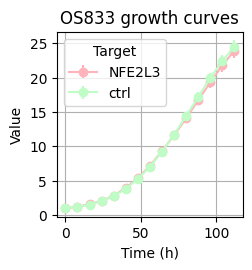

In [2]:
# Reading in the growth curve df
df = pd.read_csv("/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/Growth_curves/2024_07_03_OS833_NR0B1_NFE2L3_growth_curves.csv")

# Melt the DataFrame
tidy_df = df.melt(id_vars=['Time'], var_name='Position', value_name='Value')

# Map target labels
def map_target(position):
    if position.endswith('5'):
        return 'NFE2L3'
    elif position.endswith('6'):
        return 'NR0B1'
    elif position.endswith('7'):
        return 'ctrl'
    else:
        return 'Unknown'

tidy_df['target'] = tidy_df['Position'].apply(map_target)

# Filter to keep only NFE2L3 and ctrl
tidy_df = tidy_df[tidy_df['target'].isin(['NFE2L3', 'ctrl'])]

# Calculate mean and std
summary_df = tidy_df.groupby(['Time', 'target']).agg(
    mean_value=('Value', 'mean'),
    std_value=('Value', 'std')
).reset_index()

summary_df['std_value'].fillna(0, inplace=True)

# Define colors
colors = {
    'NFE2L3': '#FFB3BA',  # Pastel red
    'ctrl': '#BFFCC6'     # Pastel green
}

# Plot
plt.figure(figsize=(2.4, 2.4))
for target in ['NFE2L3', 'ctrl']:
    target_data = summary_df[summary_df['target'] == target]
    if (target_data['std_value'] == 0).all():
        plt.plot(target_data['Time'], target_data['mean_value'], label=target, color=colors[target], marker='o')
    else:
        plt.errorbar(target_data['Time'], target_data['mean_value'], yerr=target_data['std_value'], label=target, fmt='-o', color=colors[target])

plt.xlabel('Time (h)')
plt.ylabel('Value')
plt.title('OS833 growth curves')
plt.legend(title='Target')
plt.grid(True)

# Uncomment to save
plt.savefig('/Users/brendamelano/Desktop/OS833_line_plot.svg', format='svg', bbox_inches='tight')

plt.show()

